In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../raw_data/data_2021-31-08-cleaned_newds_gd.csv")

In [3]:
data

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
0,0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,"['border', 'patrol', 'agents', 'prevent', 'ter...",11,10,52.0,48.0,neutral
1,1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,"['gap', 'brands', 'bridge', 'gaps', 'see', 'wo...",16,13,55.0,45.0,masculine
2,2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,"['county', 'san', 'diego', 'invites', 'resumes...",5,3,62.0,37.0,masculine
3,3,job_38eab52a8b828c7f,https://www.indeed.com/rc/clk?jk=38eab52a8b828...,"Malibu, CA","City of Malibu, CA",Code Enforcement Officer,Application Deadline\nApplication Deadline Ext...,"https://www.indeed.com/cmp/City of Malibu, CA","['application', 'deadline', 'application', 'de...",0,0,0.0,0.0,masculine
4,4,job_6dc51c91cb582a3e,https://www.indeed.com/company/SafeStreetsUSA/...,"Sacramento, CA 95811 (Midtown - Winn Park Capi...",SafeStreetsUSA,newAPPRENTICE NEEDED ASAP,SafeStreets is the largest provider of ADT sec...,https://www.indeed.com/cmp/SafeStreetsUSA,"['safestreets', 'largest', 'provider', 'adt', ...",0,1,0.0,100.0,feminine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3115,job_8c96d5ddce253c87,https://www.indeed.com/rc/clk?jk=8c96d5ddce253...,"Seattle, WA",Redfin,Senior Software Developer - User Engagement,Redfin is revolutionizing the $75 billion real...,https://www.indeed.com/cmp/Redfin,"['redfin', 'revolutionizing', 'billion', 'real...",8,17,32.0,68.0,feminine
3116,3116,job_34c5701ee3660418,https://www.indeed.com/rc/clk?jk=34c5701ee3660...,"Seattle, WA 98195 (University District area)",University of Washington,newSPECIAL EVENTS COORDINATOR,"Notes: As a UW employee, you will enjoy genero...",https://www.indeed.com/cmp/University of Washi...,"['notes', 'uw', 'employee', 'enjoy', 'generous...",46,53,46.0,54.0,feminine
3117,3117,job_f2606dc37eed190e,https://www.indeed.com/rc/clk?jk=f2606dc37eed1...,"Seattle, WA",Comtech Telecommunications Corp.,Data Analyst,The Data Analyst’s responsibility is to collec...,https://www.indeed.com/cmp/Comtech Telecommuni...,"['data', 'analyst', 'responsibility', 'collect...",26,16,62.0,38.0,masculine
3118,3118,job_86f9f274d345a8f7,https://www.indeed.com/rc/clk?jk=86f9f274d345a...,"Seattle, WA",US National Oceanic and Atmospheric Administra...,"newFinancial Technician, ZS-0503-5 (MAP)",Duties\nSummary\nThis position is located in t...,https://www.indeed.com/cmp/US National Oceanic...,"['duties', 'summary', 'position', 'located', '...",70,35,67.0,33.0,masculine


In [4]:
data.groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,
TikTok,50,50,50,50,50,50,50,50,50,50,50,50,50
Amazon.com Services LLC,45,45,45,45,45,45,45,45,45,45,45,45,45
Facebook,33,33,33,33,33,33,33,33,33,33,33,33,33
Uber,30,30,30,30,30,30,30,30,30,30,30,30,30
Klein Independent School District,26,26,26,26,26,26,26,26,26,26,26,26,26


<AxesSubplot:>

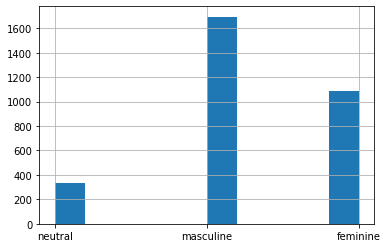

In [5]:
data['gender'].hist()

<AxesSubplot:>

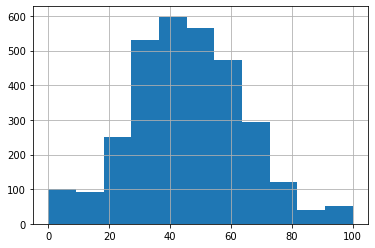

In [6]:
data['fem_coded'].hist(bins=11)

<AxesSubplot:>

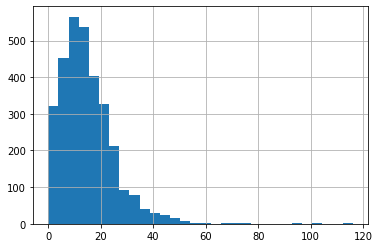

In [7]:
data['fem_words'].hist(bins=30)

<AxesSubplot:>

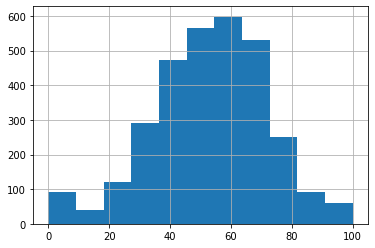

In [8]:
data['masc_coded'].hist(bins=11)

<AxesSubplot:>

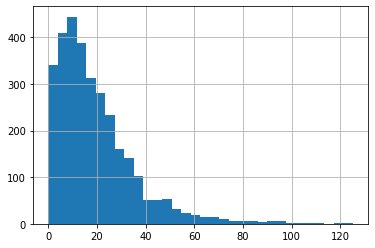

In [9]:
data['masc_words'].hist(bins=32)

In [10]:
data[data['gender'] == 'feminine'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,
TikTok,22,22,22,22,22,22,22,22,22,22,22,22,22
Texas Children's Hospital,16,16,16,16,16,16,16,16,16,16,16,16,16
HEB,15,15,15,15,15,15,15,15,15,15,15,15,15
Uber,13,13,13,13,13,13,13,13,13,13,13,13,13
Netflix,12,12,12,12,12,12,12,12,12,12,12,12,12


In [11]:
data[data['gender'] == 'masculine'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,
Amazon.com Services LLC,27,27,27,27,27,27,27,27,27,27,27,27,27
Klein Independent School District,19,19,19,19,19,19,19,19,19,19,19,19,19
TikTok,18,18,18,18,18,18,18,18,18,18,18,18,18
Google,16,16,16,16,16,16,16,16,16,16,16,16,16
"Amazon Web Services, Inc.",16,16,16,16,16,16,16,16,16,16,16,16,16


In [12]:
data[data['gender'] == 'neutral'].groupby('company_name').count().sort_values('gender', ascending=False).head()

,Unnamed: 0,job_id,url,loc,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
company_name,,,,,,,,,,,,,
TikTok,10,10,10,10,10,10,10,10,10,10,10,10,10
Amazon.com Services LLC,8,8,8,8,8,8,8,8,8,8,8,8,8
Facebook,7,7,7,7,7,7,7,7,7,7,7,7,7
California State University,4,4,4,4,4,4,4,4,4,4,4,4,4
University of California Berkeley,4,4,4,4,4,4,4,4,4,4,4,4,4


In [13]:
data[data['company_name'] == 'TikTok'].groupby('gender').count()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded
gender,,,,,,,,,,,,,
feminine,22,22,22,22,22,22,22,22,22,22,22,22,22
masculine,18,18,18,18,18,18,18,18,18,18,18,18,18
neutral,10,10,10,10,10,10,10,10,10,10,10,10,10


In [14]:
data[data['gender'] == 'feminine'].sort_values(['fem_coded', 'fem_words'], ascending=False).head()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
1302,1302,job_81c903695e392a05,https://www.indeed.com/rc/clk?jk=81c903695e392...,"Lake Success, NY•Remote",PM Pediatrics,Corporate Patient Access Registrar - Remote,It's fun to work in a company where people tru...,https://www.indeed.com/cmp/PM Pediatrics,"['fun', 'work', 'company', 'people', 'truly', ...",0,11,0.0,100.0,feminine
598,598,job_af487169a6d872a4,https://www.indeed.com/rc/clk?jk=af487169a6d87...,"Upland, CA 91786",San Antonio Regional Hospital,newHousekeeping Aide,Overview:\n\nJOB SUMMARY\nThis Housekeeping Ai...,https://www.indeed.com/cmp/San Antonio Regiona...,"['overview', 'job', 'summary', 'housekeeping',...",0,8,0.0,100.0,feminine
94,94,job_d3401b893a9dc0b7,https://www.indeed.com/rc/clk?jk=d3401b893a9dc...,"Rancho Palos Verdes, CA 90275+86 locations",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,"['crew', 'members', 'create', 'warm', 'friendl...",0,7,0.0,100.0,feminine
670,670,job_8c31e4e4dac7c49c,https://www.indeed.com/rc/clk?jk=8c31e4e4dac7c...,"San Jose, CA 95129 (West San Jose area)+87 loc...",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,"['crew', 'members', 'create', 'warm', 'friendl...",0,7,0.0,100.0,feminine
678,678,job_d0c5fa64e9568e59,https://www.indeed.com/rc/clk?jk=d0c5fa64e9568...,"Thousand Oaks, CA 91360+87 locations",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,"['crew', 'members', 'create', 'warm', 'friendl...",0,7,0.0,100.0,feminine


In [15]:
data[data['company_name'] == 'PM Pediatrics']

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
1302,1302,job_81c903695e392a05,https://www.indeed.com/rc/clk?jk=81c903695e392...,"Lake Success, NY•Remote",PM Pediatrics,Corporate Patient Access Registrar - Remote,It's fun to work in a company where people tru...,https://www.indeed.com/cmp/PM Pediatrics,"['fun', 'work', 'company', 'people', 'truly', ...",0,11,0.0,100.0,feminine


In [16]:
data[data['company_name'] == 'San Antonio Regional Hospital']

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
451,451,job_7da4f156dd3bf8ad,https://www.indeed.com/rc/clk?jk=7da4f156dd3bf...,"Upland, CA 91786",San Antonio Regional Hospital,newPatient Access Representative,Overview:\n\nJOB SUMMARY\nThe Patient Access R...,https://www.indeed.com/cmp/San Antonio Regiona...,"['overview', 'job', 'summary', 'patient', 'acc...",1,3,25.0,75.0,feminine
598,598,job_af487169a6d872a4,https://www.indeed.com/rc/clk?jk=af487169a6d87...,"Upland, CA 91786",San Antonio Regional Hospital,newHousekeeping Aide,Overview:\n\nJOB SUMMARY\nThis Housekeeping Ai...,https://www.indeed.com/cmp/San Antonio Regiona...,"['overview', 'job', 'summary', 'housekeeping',...",0,8,0.0,100.0,feminine


In [17]:
data[data['company_name'] == "Trader Joe's"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
94,94,job_d3401b893a9dc0b7,https://www.indeed.com/rc/clk?jk=d3401b893a9dc...,"Rancho Palos Verdes, CA 90275+86 locations",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,"['crew', 'members', 'create', 'warm', 'friendl...",0,7,0.0,100.0,feminine
670,670,job_8c31e4e4dac7c49c,https://www.indeed.com/rc/clk?jk=8c31e4e4dac7c...,"San Jose, CA 95129 (West San Jose area)+87 loc...",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,"['crew', 'members', 'create', 'warm', 'friendl...",0,7,0.0,100.0,feminine
678,678,job_d0c5fa64e9568e59,https://www.indeed.com/rc/clk?jk=d0c5fa64e9568...,"Thousand Oaks, CA 91360+87 locations",Trader Joe's,newCrew,Is it you?\nOur Crew Members create a warm and...,https://www.indeed.com/cmp/Trader Joe's,"['crew', 'members', 'create', 'warm', 'friendl...",0,7,0.0,100.0,feminine


In [18]:
data[data['gender'] == 'masculine'].sort_values(['masc_coded', 'masc_words'], ascending=False).head()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
798,798,job_cf897c6c4096f6f1,https://www.indeed.com/company/Scorpion-Intern...,Remote,Scorpion Internet Marketing,Data Analyst,"As a Data Analyst at Scorpion, you’ll work wit...",https://www.indeed.com/cmp/Scorpion Internet M...,"['data', 'analyst', 'scorpion', 'work', 'growi...",21,0,100.0,0.0,masculine
1860,1860,job_5b89f3855efae6c9,https://www.indeed.com/company/Goodwill-Indust...,"Laredo, TX 78041+4 locations",Goodwill Industries of South Texas,newDATA ENTRY OPERATOR II,IMPORTANT INFORMATION: PLEASE READ FIRST.This ...,https://www.indeed.com/cmp/Goodwill Industries...,"['important', 'information', 'please', 'read',...",12,0,100.0,0.0,masculine
102,102,job_f8c96ae171e7c0df,https://www.indeed.com/company/Los-Angeles-Uni...,"Los Angeles, CA 90017 (Westlake area)",Los Angeles Unified School District,newNew Job Opening* Maintenance Planner-Apply ...,"Job Description: *To be officially considered,...",https://www.indeed.com/cmp/Los Angeles Unified...,"['job', 'description', 'officially', 'consider...",8,0,100.0,0.0,masculine
661,661,job_74ccb2128103e468,https://www.indeed.com/rc/clk?jk=74ccb2128103e...,"Monterey, CA+2 locations",Transportation Security Administration,newLead Transportation Security Officer,"Securing Travel, Protecting People - At the Tr...",https://www.indeed.com/cmp/Transportation Secu...,"['securing', 'travel', 'protecting', 'people',...",6,0,100.0,0.0,masculine
665,665,job_0fed907fa8cad786,https://www.indeed.com/rc/clk?jk=0fed907fa8cad...,"San Francisco, CA+1 location",Transportation Security Administration,Transportation Security Specialist,"Securing Travel, Protecting People - At the Tr...",https://www.indeed.com/cmp/Transportation Secu...,"['securing', 'travel', 'protecting', 'people',...",6,0,100.0,0.0,masculine


In [19]:
data[data['company_name'] == "Scorpion Internet Marketing"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
798,798,job_cf897c6c4096f6f1,https://www.indeed.com/company/Scorpion-Intern...,Remote,Scorpion Internet Marketing,Data Analyst,"As a Data Analyst at Scorpion, you’ll work wit...",https://www.indeed.com/cmp/Scorpion Internet M...,"['data', 'analyst', 'scorpion', 'work', 'growi...",21,0,100.0,0.0,masculine


In [20]:
data[data['company_name'] == "Goodwill Industries of South Texas"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
1860,1860,job_5b89f3855efae6c9,https://www.indeed.com/company/Goodwill-Indust...,"Laredo, TX 78041+4 locations",Goodwill Industries of South Texas,newDATA ENTRY OPERATOR II,IMPORTANT INFORMATION: PLEASE READ FIRST.This ...,https://www.indeed.com/cmp/Goodwill Industries...,"['important', 'information', 'please', 'read',...",12,0,100.0,0.0,masculine


In [21]:
data[data['company_name'] == "Los Angeles Unified School District"]

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
102,102,job_f8c96ae171e7c0df,https://www.indeed.com/company/Los-Angeles-Uni...,"Los Angeles, CA 90017 (Westlake area)",Los Angeles Unified School District,newNew Job Opening* Maintenance Planner-Apply ...,"Job Description: *To be officially considered,...",https://www.indeed.com/cmp/Los Angeles Unified...,"['job', 'description', 'officially', 'consider...",8,0,100.0,0.0,masculine
503,503,job_3caf8493b61af2be,https://www.indeed.com/company/Los-Angeles-Uni...,"Los Angeles, CA 90017 (Westlake area)",Los Angeles Unified School District,Special Education Paraprofessional (Sub)* Urge...,LAUSD is looking Immediately to hire Substitut...,https://www.indeed.com/cmp/Los Angeles Unified...,"['lausd', 'looking', 'immediately', 'hire', 's...",3,2,60.0,40.0,masculine
567,567,job_2e217ef8e516793c,https://www.indeed.com/company/Los-Angeles-Uni...,"Los Angeles, CA 90017 (Westlake area)",Los Angeles Unified School District,newHuman Resources Representative* Hiring Now*...,"JOB DESCRIPTION*To be officially considered, a...",https://www.indeed.com/cmp/Los Angeles Unified...,"['job', 'description', 'officially', 'consider...",6,12,33.0,67.0,feminine


In [22]:
data[data['gender'] == 'neutral'].sort_values(['masc_coded', 'masc_words'], ascending=False).head()

,Unnamed: 0,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
2571,2571,job_1abb99d06fd81315,https://www.indeed.com/rc/clk?jk=1abb99d06fd81...,"Berkeley, CA 94720",University of California Berkeley,IT Director (0530U) - 20999,IT Director (0530U) - 20999 About Berkeley\n\n...,https://www.indeed.com/cmp/University of Calif...,"['director', 'berkeley', 'university', 'califo...",54,50,52.0,48.0,neutral
2383,2383,job_74b658189f5a4d45,https://www.indeed.com/rc/clk?jk=74b658189f5a4...,"San Mateo, CA 94402 (College Heights area)",San Mateo County Community College District,Part-time Personal Counselor Supporting Black ...,Part-time Personal Counselor Supporting Black ...,https://www.indeed.com/cmp/San Mateo County Co...,"['personal', 'counselor', 'supporting', 'black...",53,49,52.0,48.0,neutral
2390,2390,job_9c7eaa3efef2458b,https://www.indeed.com/rc/clk?jk=9c7eaa3efef24...,"San Francisco, CA•Remote",United for Respect,California State Organizer,ABOUT UNITED FOR RESPECT\n\nUnited for Respect...,https://www.indeed.com/cmp/United for Respect,"['united', 'respect', 'united', 'respect', 'uf...",50,46,52.0,48.0,neutral
1126,1126,job_d978321799285f5e,https://www.indeed.com/company/For-Our-Future-...,"Washington, DC 20005 (Logan Circle area)•Remote",For Our Future Action Fund,National Regional Data Director,Job Advertisement: National Regional Data Dir...,https://www.indeed.com/cmp/For Our Future Acti...,"['job', 'advertisement', 'national', 'regional...",40,37,52.0,48.0,neutral
1467,1467,job_1353f94ac9c450c0,https://www.indeed.com/rc/clk?jk=1353f94ac9c45...,"Missouri City, TX 77459",United States Postal Service,newPSE MAIL PROCESSING CLERK,United States Postal Service\nExternal Publica...,https://www.indeed.com/cmp/United States Posta...,"['united', 'states', 'postal', 'service', 'ext...",35,32,52.0,48.0,neutral
